In [26]:
import tensorflow as tf
# %matplotlib inline 
import matplotlib.pyplot as plt


# Get the mnist dataset
mnist = tf.keras.datasets.mnist

# Unpack training and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to between 0-1 rather than 0-255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Sequential model (add layer by layer), less complex than a functional model
model = tf.keras.models.Sequential()

# Use keras to flatten our input layer to a single dimension array
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# 128 neurons, relu (rectified linear) as activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Output Layer - 10 neurons, using Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Training params for the model: using 'adam' optimizer, loss for degree of error, return accuracy metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, Define 'epochs', how many times we run the training
model.fit(x_train, y_train, epochs=3)



Epoch 1/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2636 - acc: 0.9231
Epoch 2/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1053 - acc: 0.9674
Epoch 3/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0720 - acc: 0.9775


In [27]:
# Calculate the loss and accuracy validations
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.0922 - acc: 0.9729
0.09217581622945145 0.9729


In [28]:
# Save the model
model.save('numberPredictor.h5')

In [29]:
# Load the saved Model
working_model = tf.keras.models.load_model('numberPredictor.h5')

In [30]:
# Predictions is the loaded model predicting what number it has been given from the test set
predictions = working_model.predict([x_test])
print(predictions)

[[1.0699421e-11 7.8728704e-09 2.8615655e-06 ... 9.9999464e-01
  4.0394276e-08 1.7835322e-07]
 [4.6283082e-11 1.0334031e-05 9.9998951e-01 ... 3.4633185e-10
  8.5547275e-10 6.9624922e-15]
 [8.4588114e-09 9.9974388e-01 5.6686542e-05 ... 1.3872524e-04
  1.7540704e-05 1.3898271e-07]
 ...
 [6.2157297e-09 2.0928990e-06 1.3168372e-07 ... 1.3221748e-04
  1.0185138e-05 8.3550753e-05]
 [4.7461586e-07 1.2433382e-07 4.5951492e-07 ... 6.1625178e-06
  1.2397141e-03 6.9091112e-07]
 [5.2963526e-07 3.7019481e-09 1.3922572e-07 ... 4.6102819e-11
  6.4422892e-07 8.1361812e-10]]


In [31]:
# Using numpy to display the predicted number in the list
import numpy as np
print(np.argmax(predictions[55]))

0


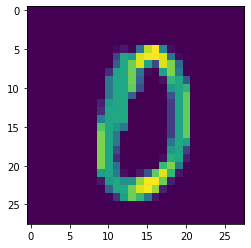

In [32]:
# Using matplotlib to display the predicted number for comparison
plt.imshow(x_test[55])
plt.show()